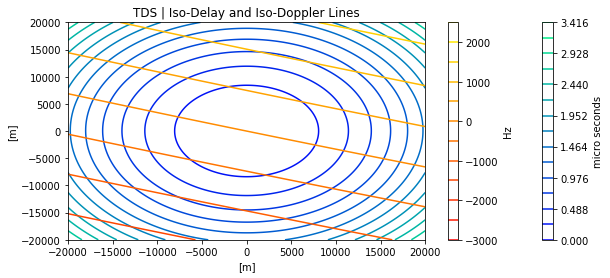

In [31]:
# TDS

h_0 = 20000e3
h = 500e3

def z_sp(x, y):
    R = 6373310.2078
    return (R**2 -x**2 -y**2 )**(1/2) - R

def time_eq(x, y):
    c = 299792458 # m/s
    return (1/c)*( \
           (x**2 + (y-h_0/np.tan(elev))**2 + (z_sp(x,y)-h_0)**2)**(1/2) + \
           (x**2 + (-h/np.tan(elev) -y)**2 + (h - z_sp(x,y))**2)**(1/2) \
           )

def time_inc_eq(x, y):
    return time_eq(x,y) - time_eq(0,0)

def time_inc_eq_usec(x, y):
    return (time_eq(x,y) - time_eq(0,0))*1e6

def doppler_eq(x, y):
    # GPS L1 center frequency
    c = 299792458 # m/s
    #f_c = 1575.42e6 # Hz 
    f_0 = 10.23e6 # Hz
    f_c = 154*f_0;
    
    v_tx = 2121
    v_ty = 2121
    v_tz = 5
    
    v_rx = 2210
    v_ry = 7299
    v_rz = 199
    return (f_c/c)*( \
            (v_tx*(x)  + v_ty*(y-h_0/np.tan(elev)) + v_tz*(z_sp(x,y)-h_0))  / (x**2 + (y-h_0/np.tan(elev))**2 + (z_sp(x,y)-h_0)**2)**(1/2) \
           -(v_rx*(-x) + v_ry*(-h/np.tan(elev)-y)  + v_rz*(h-z_sp(x,y))   ) / (x**2 + (-h/np.tan(elev) -y)**2 + (h - z_sp(x,y))**2)**(1/2) \
            )

def doppler_inc_eq(x, y):
    return doppler_eq(x,y) - doppler_eq(0,0)

import numpy as np
import os
from shapely import geometry
import matplotlib.pyplot as plt
from netCDF4 import Dataset

elev = 72.2*np.pi/180

extent = 20e3
extent_x0 =  -20e3
extent_x1 =  20e3
extent_y0 =  -20e3
extent_y1 =  20e3
linsapce_delta = 500

X, Y = np.meshgrid(
        np.linspace(extent_x0, extent_x1, linsapce_delta), 
        np.linspace(extent_y0, extent_y1, linsapce_delta)
        )

Z_time = time_inc_eq_usec(X,Y)
Z_doppler = doppler_inc_eq(X,Y)

# Iso-Delay and Iso-Doppler Lines
fig_lines, ax_lines = plt.subplots(1,figsize=(10, 4))
ax_lines.set_title('TDS | Iso-Delay and Iso-Doppler Lines')
plt.xlabel('[m]')
plt.ylabel('[m]')
iso_delay_values = list(np.arange(0,2.44e-7*1e6*15,2.44e-7*1e6))
c_time = ax_lines.contour(X, Y, Z_time, iso_delay_values, cmap='winter')
#c_time = ax_lines.contour(X, Y, Z_time, cmap='winter')
fig_lines.colorbar(c_time, label='micro seconds', )
iso_doppler_values = list(np.arange(-3000,3000,500))
c_doppler = ax_lines.contour(X, Y, Z_doppler, iso_doppler_values, cmap='autumn')
#c_doppler = ax_lines.contour(X, Y, Z_doppler, cmap='autumn')
fig_lines.colorbar(c_doppler, label='Hz')

resolution in chips: {0} 0.24961200000000003


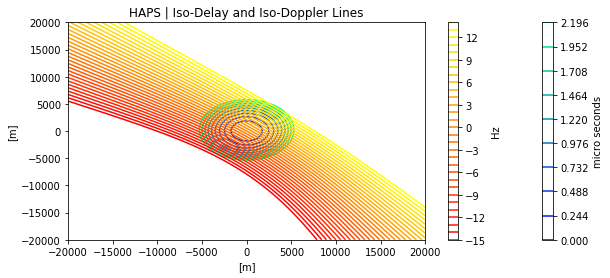

In [89]:
# HAPS

h_0 = 20000e3
h = 20e3

def z_sp(x, y):
    R = 6373310.2078
    return (R**2 -x**2 -y**2 )**(1/2) - R

def time_eq(x, y):
    c = 299792458 # m/s
    return (1/c)*( \
           (x**2 + (y-h_0/np.tan(elev))**2 + (z_sp(x,y)-h_0)**2)**(1/2) + \
           (x**2 + (-h/np.tan(elev) -y)**2 + (h - z_sp(x,y))**2)**(1/2) \
           )

def time_inc_eq(x, y):
    return time_eq(x,y) - time_eq(0,0)

def doppler_eq(x, y):
    # GPS L1 center frequency
    c = 299792458 # m/s
    #f_c = 1575.42e6 # Hz 
    f_0 = 10.23e6 # Hz
    f_c = 154*f_0;
    
    v_tx = 2121
    v_ty = 2121
    v_tz = 5
    
    v_rx = 5
    v_ry = 5
    v_rz = 5
    return (f_c/c)*( \
            (v_tx*(x)  + v_ty*(y-h_0/np.tan(elev)) + v_tz*(z_sp(x,y)-h_0))  / (x**2 + (y-h_0/np.tan(elev))**2 + (z_sp(x,y)-h_0)**2)**(1/2) \
           -(v_rx*(-x) + v_ry*(-h/np.tan(elev)-y)  + v_rz*(h-z_sp(x,y))   ) / (x**2 + (-h/np.tan(elev) -y)**2 + (h - z_sp(x,y))**2)**(1/2) \
            )

def doppler_inc_eq(x, y):
    return doppler_eq(x,y) - doppler_eq(0,0)

import numpy as np
import os
from shapely import geometry
import matplotlib.pyplot as plt
from netCDF4 import Dataset

elev = 72.2*np.pi/180

extent_x0 =  -20e3
extent_x1 =  20e3
extent_y0 =  -20e3
extent_y1 =  20e3
linsapce_delta = 500

X, Y = np.meshgrid(
        np.linspace(extent_x0, extent_x1, linsapce_delta), 
        np.linspace(extent_y0, extent_y1, linsapce_delta)
        )

Z_time = time_inc_eq_usec(X,Y)
Z_doppler = doppler_inc_eq(X,Y)

# Iso-Delay and Iso-Doppler Lines
fig_lines, ax_lines = plt.subplots(1,figsize=(10, 4))
ax_lines.set_title('HAPS | Iso-Delay and Iso-Doppler Lines')
plt.xlabel('[m]')
plt.ylabel('[m]')
time_resolution = 2.44e-7
iso_delay_values = list(np.arange(0,2.44e-7*10*1e6,time_resolution*1e6))
c_time = ax_lines.contour(X, Y, Z_time, iso_delay_values, cmap='winter')
#c_time = ax_lines.contour(X, Y, Z_time, cmap='winter')
fig_lines.colorbar(c_time, label='micro seconds', )
iso_doppler_values = list(np.arange(-15,15,1))
c_doppler = ax_lines.contour(X, Y, Z_doppler, iso_doppler_values, cmap='autumn')
#c_doppler = ax_lines.contour(X, Y, Z_doppler, cmap='autumn')
fig_lines.colorbar(c_doppler, label='Hz')

chips_per_second = 1.023e6
print("resolution in chips: {0}", time_resolution*chips_per_second)

In [57]:
import numpy as np
import os
from shapely import geometry
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from gnssr.tds.tds_data import *
from gnssr.utils import *
from gnssr.targets import *
from gnssr.tds.search_target.cdf4_search import *

# Nice one, only one pass
file_root_name = 'raw/L1B/2017-11-13-H18'
target = targets['devils_tower']
group = '000057'
index = 426

# 0.5 deg error approx 55 km error
if index == 0:
    search_error = 0.7 
    cdf4_search(file_root_name, target, search_error)

search_lat_deg = target.lat
search_lon_deg = target.lon

time_delay = 2.7e-6
doppler_delay = 1000

tds = tds_data(file_root_name)
tds.set_group_index(group, index)
r_r_haps= tds.r_r*(6378+20)/(6378+500)
tds.r_r = r_r_haps

r_sp, lat_sp, lon_sp = tds.find_sp()
r_t_new = tds.r_t + tds.v_t
tds.r_t = r_t_new

r_sp_new, lat_sp_new, lon_sp_new = tds.find_sp()
print("sp speed (m/s) : {0}".format(np.linalg.norm(r_sp - r_sp_new)))

sp speed (m/s) : 22.737997281619098
